# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from itertools import combinations
from itertools import permutations
from itertools import product

In [5]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S_n):
    n = S_n.shape[0]
    ids = [i for i in range(n)]
    for i in range(1, n):
        subsets = combinations(ids, i)
        for subset in subsets:
            y = np.array([0 if j in subset else 1 for j in range(n)])
            svm = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
            svm.fit(S_n, y)
            pred = svm.predict(S_n)
            if not (y == pred).all():
                return False
    return True

def shatter(S_n):
    n = S_n.shape[0]
    ids = [i for i in range(n)]
    ind = 1
    colormap = np.array(['green', 'purple'])
    fig, ax = plt.subplots(n, n, figsize=(16, 16))
    y = np.ones(n)
    ax[0, 0].scatter(S_n[:,0], S_n[:, 1], c=colormap[y.astype(int).tolist()])
    ax[0, 0].set_xlabel('True')
    for i in range(1, n):
        subsets = combinations(ids, i)
        for subset in subsets:
            y = np.array([0 if j in subset else 1 for j in range(n)])
            svm = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
            svm.fit(S_n, y)
            pred = svm.predict(S_n)
            common_params = {"estimator": svm, "X": S_n, "ax": ax[ind//4, ind-(4*(ind//4))]}
            col = 'k' if (y == pred).all() else 'r'
            DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="decision_function",
                plot_method="contour",
                levels=[0],
                colors=[col],
                linestyles=["-"],
            )
            ax[ind//4, ind-(4*(ind//4))].scatter(S_n[:,0], S_n[:, 1], c=colormap[y.astype(int).tolist()])
            ax[ind//4, ind-(4*(ind//4))].set_xlabel((y == pred).all())
            ind += 1
    y = np.zeros(n)
    ax[n-1, n-1].scatter(S_n[:,0], S_n[:, 1], c=colormap[y.astype(int).tolist()])
    ax[n-1, n-1].set_xlabel('True')
    plt.show()  

In [6]:
X = np.array([[0, 0], [1, 1], [2, 2]])
is_shattered(X)
# shatter(X)

False

### c)

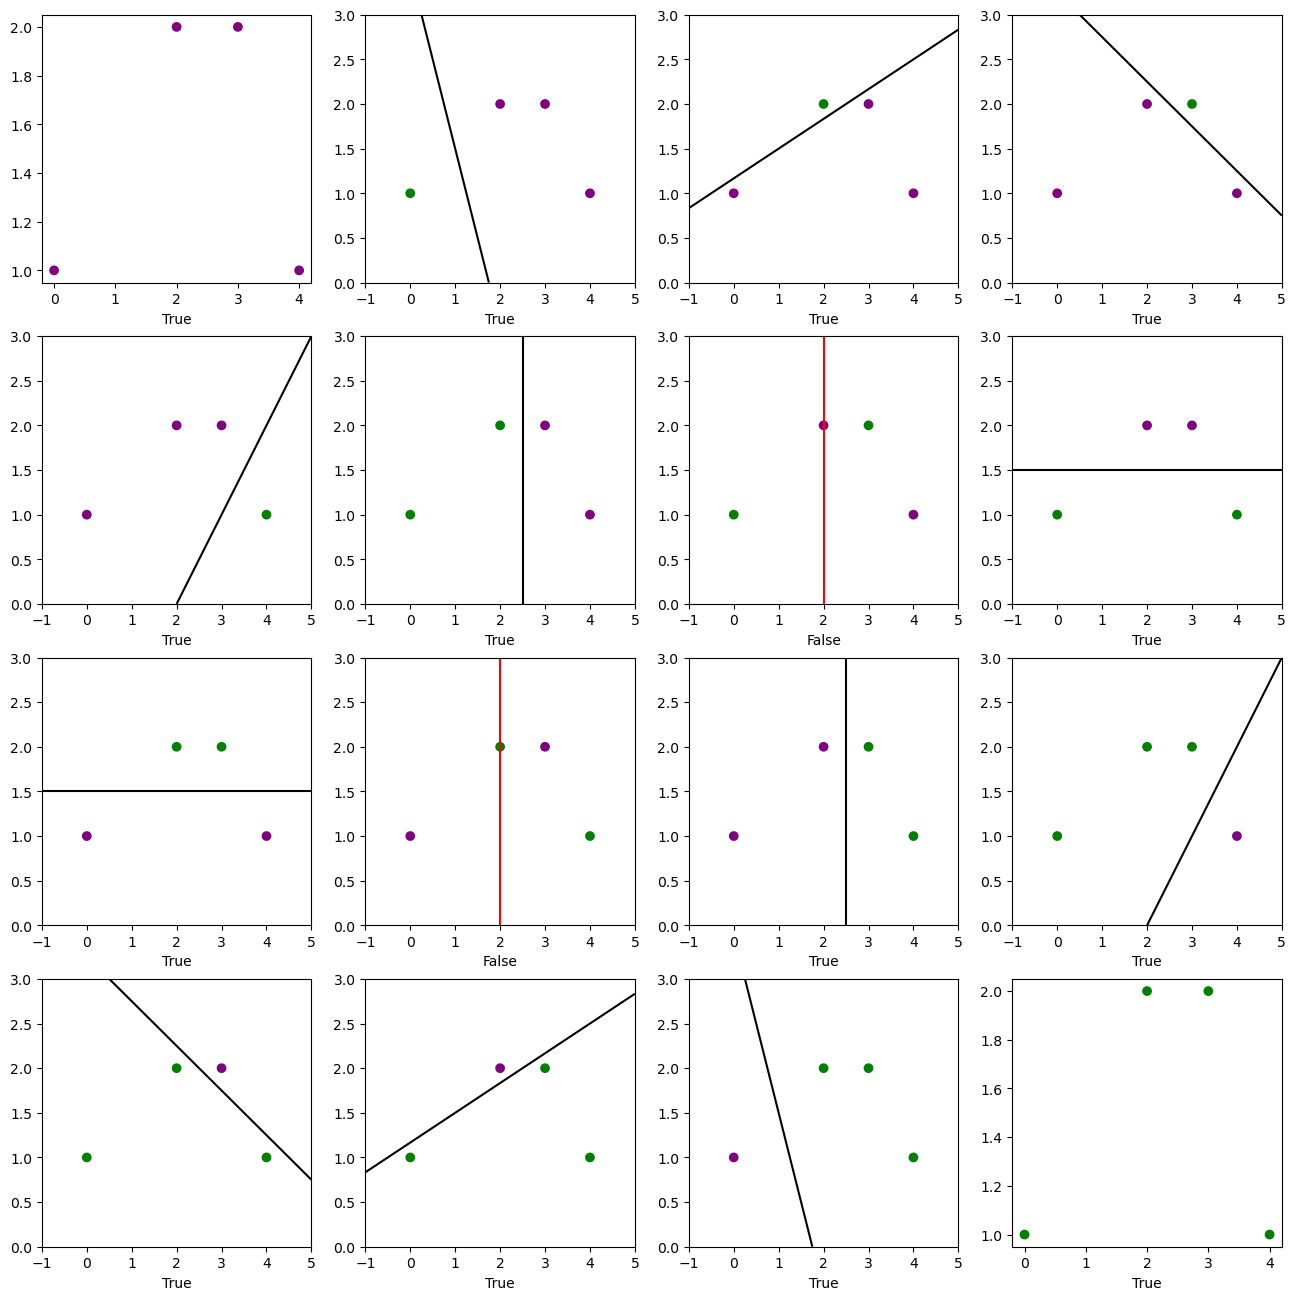

In [7]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

X = np.array([[0, 1], [2, 2], [3, 2], [4, 1]])
shatter(X)
# np.ones(4).astype(int).tolist()

### d)

In [9]:
# code
ds = [i for i in range(2, 11)]
n = 13

d_shattered = dict()
for d in ds:
    shattered = dict()
    for i in range(1, n+1):
        shattered[f'n_{i}'] = False
        for j in range(50):
            S_n = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), i)
            if is_shattered(S_n):
                shattered[f'n_{i}'] = True  
                break
        if not shattered[f'n_{i}']:
            for k in range(i+1, n+1):
                shattered[f'n_{k}'] = False
            break
    d_shattered[f'd_{d}'] = shattered
                           
d_shattered

{'d_2': {'n_1': True,
  'n_2': True,
  'n_3': True,
  'n_4': False,
  'n_5': False,
  'n_6': False,
  'n_7': False,
  'n_8': False,
  'n_9': False,
  'n_10': False,
  'n_11': False,
  'n_12': False,
  'n_13': False},
 'd_3': {'n_1': True,
  'n_2': True,
  'n_3': True,
  'n_4': True,
  'n_5': False,
  'n_6': False,
  'n_7': False,
  'n_8': False,
  'n_9': False,
  'n_10': False,
  'n_11': False,
  'n_12': False,
  'n_13': False},
 'd_4': {'n_1': True,
  'n_2': True,
  'n_3': True,
  'n_4': True,
  'n_5': True,
  'n_6': False,
  'n_7': False,
  'n_8': False,
  'n_9': False,
  'n_10': False,
  'n_11': False,
  'n_12': False,
  'n_13': False},
 'd_5': {'n_1': True,
  'n_2': True,
  'n_3': True,
  'n_4': True,
  'n_5': True,
  'n_6': True,
  'n_7': False,
  'n_8': False,
  'n_9': False,
  'n_10': False,
  'n_11': False,
  'n_12': False,
  'n_13': False},
 'd_6': {'n_1': True,
  'n_2': True,
  'n_3': True,
  'n_4': True,
  'n_5': True,
  'n_6': True,
  'n_7': True,
  'n_8': False,
  'n_9': F

In [11]:
est_VC_dim = []

for d in ds:
    for i in range(1, n+1):
        if not d_shattered[f'd_{d}'][f'n_{i}']:
            est_VC_dim.append(i)
            break

est_VC_dim

[4, 5, 6, 7, 8, 9, 10, 11, 12]

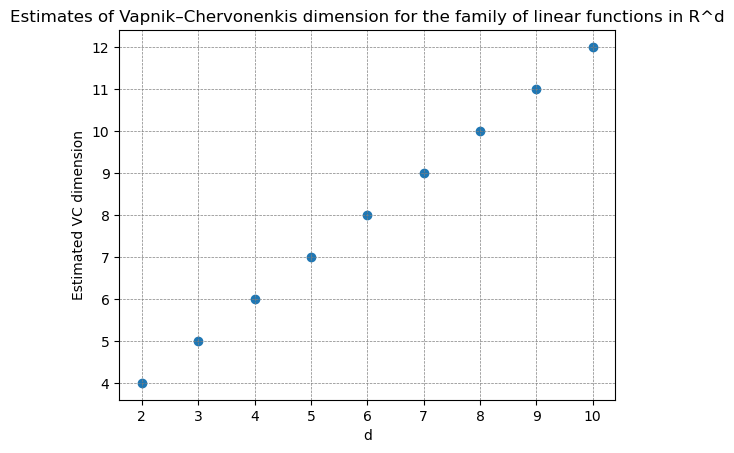

In [23]:
plt.scatter(ds, est_VC_dim)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.xlabel('d')
plt.ylabel('Estimated VC dimension')
plt.title('Estimates of Vapnik–Chervonenkis dimension for the family of linear functions in R^d')
plt.show()

We know from lecture that $VC(\mathcal{F}_{a,b}) = d+2$, and indeed obtained the same results in the above experiment.

### e)

In [ ]:
# A hint: change a kernel in SVM